## Data Preprocessing Project
Mining Manatees : Amandeep Singh, Bryant Galo, Elizabeth Hernandez-Meza , Jasmine Pincombe, Michael Lee Lawler, Xuanxuan Miao, Julian Pulido


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#We will be using the real estate valuation data set
#https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set

In [128]:
#https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set
#download dataset and paste below in the parameter
RealEstateData = pd.read_excel("C:\\Users\\Julian\\OneDrive\\Escuela\\Spring24\\CSC177\\Real estate valuation data set.xlsx")
RealEstateData

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


## Missing data and making data messy

In [129]:
#Detecting missing values
print(RealEstateData.isna().any())

randNums = [3, 10, 42, 100, 328, 400]

#forcibly make some data NA
for i in randNums:
    #replace random numbers with na
    RealEstateData.iloc[i,7] = np.nan
    RealEstateData.iloc[i,2] = np.nan

    
print(RealEstateData.isna().sum())

No                                        False
X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool
No                                        0
X1 transaction date                       0
X2 house age                              6
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                6
dtype: int64


## Estimating Missing Data

In [130]:
houseAgeMedian = RealEstateData['X2 house age'].median()
RealEstateData['X2 house age'] = RealEstateData['X2 house age'].fillna(houseAgeMedian)
print("Missing data in houseAgeMedian column: " , RealEstateData.isna().sum())
print("Median House Age" , houseAgeMedian)

Missing data in houseAgeMedian column:  No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                6
dtype: int64
Median House Age 16.1


In [131]:
houseValueMedian = RealEstateData['Y house price of unit area'].median()
RealEstateData['Y house price of unit area'] = RealEstateData['Y house price of unit area'].fillna(houseValueMedian)
print("Missing data in houseValueMedian column: " , RealEstateData.isna().sum())
print("House Value Median: " , houseValueMedian)

Missing data in houseValueMedian column:  No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
House Value Median:  38.55


List of our column names before aggregation:  ['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']


After aggreation of columnds Langitutde and Longitude into column corridnate Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'Y house price of unit area',
       'Coord'],
      dtype='object')


Y house price of unit area
(7.49, 35.075]     165
(35.075, 62.55]    236
(62.55, 90.025]     12
(90.025, 117.5]      1
Name: count, dtype: int64

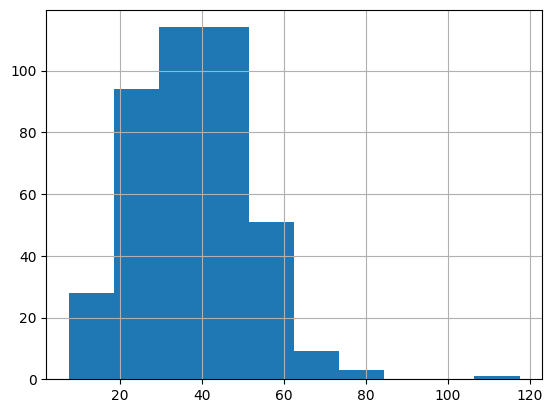

In [132]:
#TODO: Preprocess Data. Arrange steps and document techniques 
print("List of our column names before aggregation: " , list(RealEstateData.columns))

#aggregration

#combining attribute langitude and longitude into column called coordinates
RealEstateData["Coord"] = RealEstateData['X5 latitude'].astype(str) + ", " + RealEstateData['X6 longitude'].astype(str)
RealEstateData = RealEstateData.drop("X5 latitude" , axis =1)
RealEstateData = RealEstateData.drop("X6 longitude" , axis =1)
print("\n\nAfter aggreation of columnds Langitutde and Longitude into column corridnate", RealEstateData.columns)


#sample
sampleData = RealEstateData.sample(frac = 0.1)

#dimension reduction
#no need; all features are useful.

#feature subset selection
#no need; no redundant feature

#feature creation
#no need for feature creation.

#discretization and binarization
#making continuous attribute of house price into categorical in terms of price- low, medium, high
RealEstateData['Y house price of unit area'].hist(bins=10)

bins = pd.cut(RealEstateData['Y house price of unit area'],4)
bins.value_counts(sort=False)

#attribute transformation

In [133]:
#TODO: Split dataset- calculate mean and standard deviation
from sklearn.model_selection import train_test_split
if 'Coord' in RealEstateData.columns:
    RealEstateData[['Latitude', 'Longitude']] = RealEstateData['Coord'].str.split(',', expand=True)
    RealEstateData['Latitude'] = RealEstateData['Latitude'].astype(float)
    RealEstateData['Longitude'] = RealEstateData['Longitude'].astype(float)
    RealEstateData = RealEstateData.drop(columns=['Coord'])
else:
    print("The 'Coord' column does not exist.")

part1, part2 = train_test_split(RealEstateData, test_size=0.5, random_state=42)

#Compare split datasets and document difference/intuition
stats_part1 = part1.describe().loc[['mean', 'std']]
stats_part2 = part2.describe().loc[['mean', 'std']]

stats_part1, stats_part2



(              No  X1 transaction date  X2 house age  \
 mean  216.024155          2013.170692     16.993237   
 std   117.295844             0.283224     11.147225   
 
       X3 distance to the nearest MRT station  X4 number of convenience stores  \
 mean                             1068.728642                         4.115942   
 std                              1219.262138                         3.010675   
 
       Y house price of unit area   Latitude   Longitude  
 mean                   38.423188  24.969909  121.533895  
 std                    14.503268   0.012716    0.014970  ,
               No  X1 transaction date  X2 house age  \
 mean  198.975845          2013.127214     18.200966   
 std   121.655907             0.279756     11.475745   
 
       X3 distance to the nearest MRT station  X4 number of convenience stores  \
 mean                             1099.042736                         4.072464   
 std                              1306.335341                         

In [134]:
#Documentation
"""
Property Age: The slightly lower mean age in the first part suggests it contains somewhat newer properties on average 
compared to the second part. This could imply a minor difference in potential property value due to age.

Proximity to MRT Stations: The first part has properties slightly closer to MRT stations on average, as indicated by the 
lower mean distance. Closer proximity to public transport can positively affect property values.

Number of Convenience Stores: Both parts show a similar average number of convenience stores nearby, indicating that 
the split did not significantly segregate properties based on this urban convenience factor.

House Price of Unit Area: The first part has a higher average house price, which, coupled with its slightly newer 
properties and closer proximity to MRT stations, might suggest these factors play a role in property valuation.

Geographical Distribution: The very close means for latitude and longitude in both parts indicate a geographically 
consistent split, ensuring that any spatial analysis will be representative of the entire dataset.

Variability in Data: The standard deviations show that there is a broad range of values within each feature across both 
splits, indicating variability and diversity within the dataset that is crucial for robust analysis.

Conclusion:
The two dataset splits are well-balanced across key features, making them suitable for further analysis or model 
training/testing. The minor differences observed align with intuitive expectations 
about the impact of age, proximity to MRT stations, and urban conveniences on property prices. 
These insights affirm the dataset's integrity for conducting comprehensive real estate market analyses.

"""

"\nProperty Age: The slightly lower mean age in the first part suggests it contains somewhat newer properties on average \ncompared to the second part. This could imply a minor difference in potential property value due to age.\n\nProximity to MRT Stations: The first part has properties slightly closer to MRT stations on average, as indicated by the \nlower mean distance. Closer proximity to public transport can positively affect property values.\n\nNumber of Convenience Stores: Both parts show a similar average number of convenience stores nearby, indicating that \nthe split did not significantly segregate properties based on this urban convenience factor.\n\nHouse Price of Unit Area: The first part has a higher average house price, which, coupled with its slightly newer \nproperties and closer proximity to MRT stations, might suggest these factors play a role in property valuation.\n\nGeographical Distribution: The very close means for latitude and longitude in both parts indicate a 